In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import Dense, LSTM, GRU
from tensorflow.keras.models import Sequential
import math
%matplotlib inline

## データセットの前処理

In [2]:
def create_dataset(dataset, step=1):
    dataX,dataY = [], []
    for i in range(len(dataset) - step -1):
        dataX.append(dataset[i:(i+step), 0]) # step分の過去のデータを取得する
        dataY.append(dataset[i + step, 0])
    return np.array(dataX), np.array(dataY)

csvファイルの読み込み

In [3]:
dataframe = pd.read_csv('carriage.csv', usecols=[1])
dataset = dataframe.values.astype('float32')

データセットの標準化

In [4]:
scaler = StandardScaler()
dataset = scaler.fit_transform(dataset)

データセットを訓練用とテスト用に分ける

In [5]:
train_size = int(len(dataset) * 0.9)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]

データセットをLSTMやGRUに適した行列に整形する

In [6]:
step = 1
train_X, train_Y = create_dataset(train, step)
test_X, test_Y = create_dataset(test, step)
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))

## LSTMのModelを作成する

In [7]:
lstm_model = Sequential()

2021-08-04 01:09:27.740593: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Modelにlayerを追加する

In [8]:
lstm_model.add(LSTM(10, input_shape=(1, step)))
lstm_model.add(Dense(1))

Modelの設定を行う
- loss: 損失関数には平均二乗誤差を用いる
- optimizer: 最適化アルゴリズムにはRMSPropを用いる

In [9]:
lstm_model.compile(loss='mean_squared_error', optimizer='adam')

Modelの概要を見る

In [10]:
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10)                480       
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


学習する

In [11]:
lstm_model.fit(train_X, train_Y, epochs=10, batch_size=50, verbose=1)

Epoch 1/10


2021-08-04 01:09:28.255353: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


5/5 [==============================] - 2s 3ms/step - loss: 0.9377
Epoch 2/10
5/5 [==============================] - 0s 5ms/step - loss: 0.9202
Epoch 3/10
5/5 [==============================] - 0s 4ms/step - loss: 0.9028
Epoch 4/10
5/5 [==============================] - 0s 6ms/step - loss: 0.8858
Epoch 5/10
5/5 [==============================] - 0s 6ms/step - loss: 0.8688
Epoch 6/10
5/5 [==============================] - 0s 3ms/step - loss: 0.8514
Epoch 7/10
5/5 [==============================] - 0s 4ms/step - loss: 0.8351
Epoch 8/10
5/5 [==============================] - 0s 3ms/step - loss: 0.8176
Epoch 9/10
5/5 [==============================] - 0s 5ms/step - loss: 0.8004
Epoch 10/10
5/5 [==============================] - 0s 3ms/step - loss: 0.7840


予測する

In [12]:
lstm_train_predict = lstm_model.predict(train_X)
lstm_test_predict = lstm_model.predict(test_X)

標準化されている予測した値を戻す

In [13]:
lstm_train_predict = scaler.inverse_transform(lstm_train_predict)
train_Y = scaler.inverse_transform(train_Y)
lstm_test_predict = scaler.inverse_transform(lstm_test_predict)
test_Y = scaler.inverse_transform(test_Y)

予測の精度を見てみる

In [14]:
lstm_train_score = math.sqrt(mean_squared_error(train_Y, lstm_train_predict[:, 0]))
print('Error in Training data is: %.2f RMSE' % (lstm_train_score))
lstm_test_score = math.sqrt(mean_squared_error(test_Y, lstm_test_predict[:, 0]))
print('Error in Testing data is: %.2f RMSE' % (lstm_test_score))

Error in Training data is: 5.18 RMSE
Error in Testing data is: 4.11 RMSE


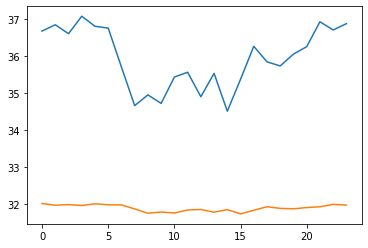

In [15]:
plt.figure()
plt.plot(test_Y)
plt.plot(lstm_test_predict[:, 0])

## GRUのModelを作成する

In [16]:
gru_model = Sequential()

Modelにlayerを追加する

In [17]:
gru_model.add(GRU(10, input_shape=(1, step)))
gru_model.add(Dense(1))

Modelの設定を行う
- loss: 損失関数には平均二乗誤差を用いる
- optimizer: 最適化アルゴリズムにはRMSPropを用いる

In [18]:
gru_model.compile(loss='mean_squared_error', optimizer='adam')

Modelの概要を見る

In [19]:
gru_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 10)                390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


学習する

In [20]:
gru_model.fit(train_X, train_Y, epochs=10, batch_size=50, verbose=1)

Epoch 1/10
5/5 [==============================] - 2s 3ms/step - loss: 995.9008
Epoch 2/10
5/5 [==============================] - 0s 5ms/step - loss: 994.6996
Epoch 3/10
5/5 [==============================] - 0s 4ms/step - loss: 993.5208
Epoch 4/10
5/5 [==============================] - 0s 6ms/step - loss: 992.2996
Epoch 5/10
5/5 [==============================] - 0s 3ms/step - loss: 991.1114
Epoch 6/10
5/5 [==============================] - 0s 4ms/step - loss: 989.8860
Epoch 7/10
5/5 [==============================] - 0s 4ms/step - loss: 988.6444
Epoch 8/10
5/5 [==============================] - 0s 5ms/step - loss: 987.3808
Epoch 9/10
5/5 [==============================] - 0s 3ms/step - loss: 986.0764
Epoch 10/10
5/5 [==============================] - 0s 4ms/step - loss: 984.7766


予測する

In [21]:
gru_train_predict = gru_model.predict(train_X)
gru_test_predict = gru_model.predict(test_X)

標準化されている予測した値を戻す

In [22]:
gru_train_predict = scaler.inverse_transform(gru_train_predict)
gru_test_predict = scaler.inverse_transform(gru_test_predict)

予測の精度を見てみる

In [23]:
gru_train_score = math.sqrt(mean_squared_error(train_Y, gru_train_predict[:, 0]))
print('Error in Training data is: %.2f RMSE' % (gru_train_score))
gru_test_score = math.sqrt(mean_squared_error(test_Y, gru_test_predict[:, 0]))
print('Error in Testing data is: %.2f RMSE' % (gru_test_score))

Error in Training data is: 6.49 RMSE
Error in Testing data is: 3.76 RMSE


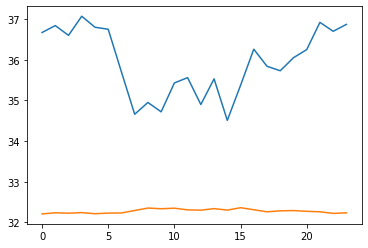

In [24]:
plt.figure()
plt.plot(test_Y)
plt.plot(gru_test_predict[:, 0])